# Descriptive analysis <b>
- What is the average track popularity each year?
- How has the average danceability of tracks changed over the years?
- Which artists have the highest average track popularity in the dataset?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('playlist_2010to2022.csv')
df

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",86,...,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",75,...,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,69,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",61,...,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,88,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",83,...,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,74,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",65,...,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,2g6tReTlM2Akp41g0HaeXN,Die Hard,79,Mr. Morale & The Big Steppers,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,"['conscious hip hop', 'hip hop', 'rap', 'west ...",86,...,-8.072,0.0,0.2470,0.31900,0.001160,0.1270,0.362,100.988,239027.0,4.0
2296,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,4pi1G1x8tl9VfdD9bL3maT,Big Energy,69,777,3MdXrJWsbVzdn6fe5JYkSQ,Latto,['trap queen'],85,...,-4.431,0.0,0.1150,0.04530,0.000000,0.3410,0.794,106.022,172540.0,4.0
2297,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,3LtpKP5abr2qqjunvjlX5i,Doja,86,Doja,5H4yInM5zmHqpKIoMNAx4r,Central Cee,['melodic drill'],82,...,-7.430,1.0,0.2880,0.38000,0.000000,0.4030,0.972,140.040,97393.0,4.0
2298,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,3XOalgusokruzA5ZBA2Qcb,pushin P (feat. Young Thug),77,DS4EVER,2hlmm7s2ICUX0LVIhVFlZQ,Gunna,"['atl hip hop', 'melodic rap', 'rap', 'trap']",84,...,-4.572,0.0,0.1870,0.00783,0.006930,0.1290,0.488,77.502,136267.0,1.0


In [3]:
df.columns = [col.replace('_',' ') for col in df.columns]
df.columns

Index(['playlist url', 'year', 'track id', 'track name', 'track popularity',
       'album', 'artist id', 'artist name', 'artist genres',
       'artist popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration ms', 'time signature'],
      dtype='object')

## What is the average track popularity each year?

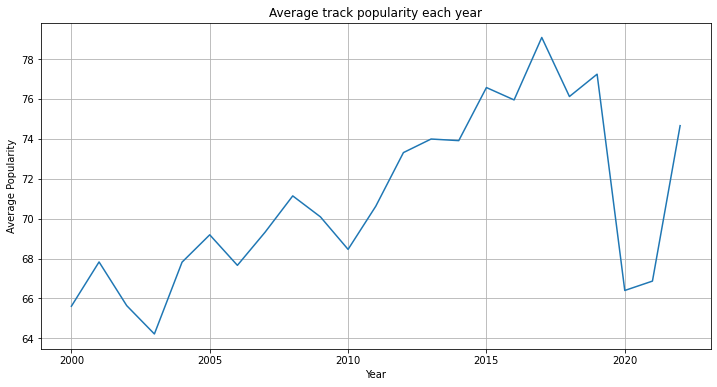

In [4]:
avg_track_popularity_each_year = df.groupby('year')['track popularity'].mean()

plt.figure(figsize = (12,6))
avg_track_popularity_each_year.plot()
plt.title('Average track popularity each year')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()

## How has the average danceability of tracks changed over the years?

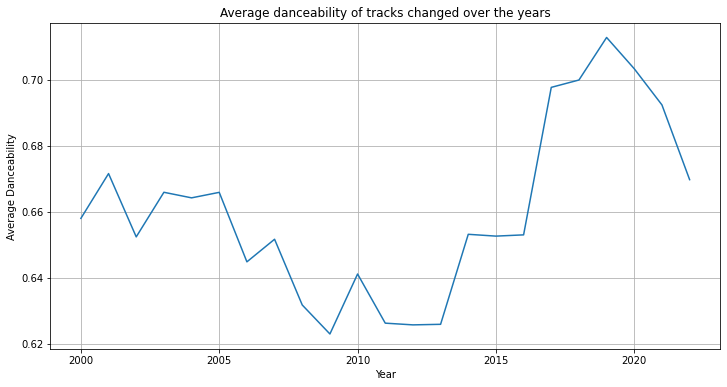

In [5]:
avg_danceability_track_over_years = df.groupby('year')['danceability'].mean()

plt.figure(figsize = (12,6))
avg_danceability_track_over_years.plot()
plt.title('Average danceability of tracks changed over the years')
plt.xlabel('Year')
plt.ylabel('Average Danceability')
plt.grid(True)
plt.show()

## Which artists have the highest average track popularity in the dataset?

In [8]:
artist_avg_track_popularity = df.groupby('artist name')['track popularity'].mean().reset_index()
artist_avg_track_popularity

,artist name,track popularity
0,*NSYNC,64.833333
1,112,62.000000
2,2 Chainz,72.000000
3,21 Savage,80.500000
4,24kGoldn,44.500000
...,...,...
886,girl in red,86.000000
887,iann dior,69.500000
888,iio,59.000000
889,t.A.T.u.,78.000000


In [11]:
top_artist_by_track_popularity = artist_avg_track_popularity.sort_values(by='track popularity', ascending=False)
top_artist_by_track_popularity

,artist name,track popularity
662,Rema,92.000000
95,Bizarrap,91.000000
822,Tom Odell,91.000000
280,Frank Ocean,90.000000
785,The Neighbourhood,88.500000
...,...,...
76,BTS,24.571429
615,PARTYNEXTDOOR,4.000000
454,Lauren Spencer Smith,3.000000
680,Rosa Linn,3.000000


# Exploratory Analysis
- Is there a correlation between track popularity and other musical features like danceability, energy, or valence?
- How do various genres (from artist_genres) differ in terms of musical features like loudness, tempo, or acousticness?
- Are there any distinct clusters of songs when you consider features like danceability, energy, and valence?